<a href="https://colab.research.google.com/github/yaramahmoud1996/Churn/blob/master/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,plot_roc_curve,roc_curve
from sklearn.model_selection import train_test_split

##classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn import model_selection
from numpy import mean
from sklearn.model_selection import cross_val_score
from scipy.optimize import brentq
from scipy.interpolate import interp1d

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def EER_score(y_true,y_pred):
  fpr, tpr, thresholds = roc_curve(y_test,y_pred)
  eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
  thresh = interp1d(fpr, thresholds)(eer)
  return eer

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [4]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

since there were no nulls we don't need to clean the data

In [6]:
train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

There is an imbalance

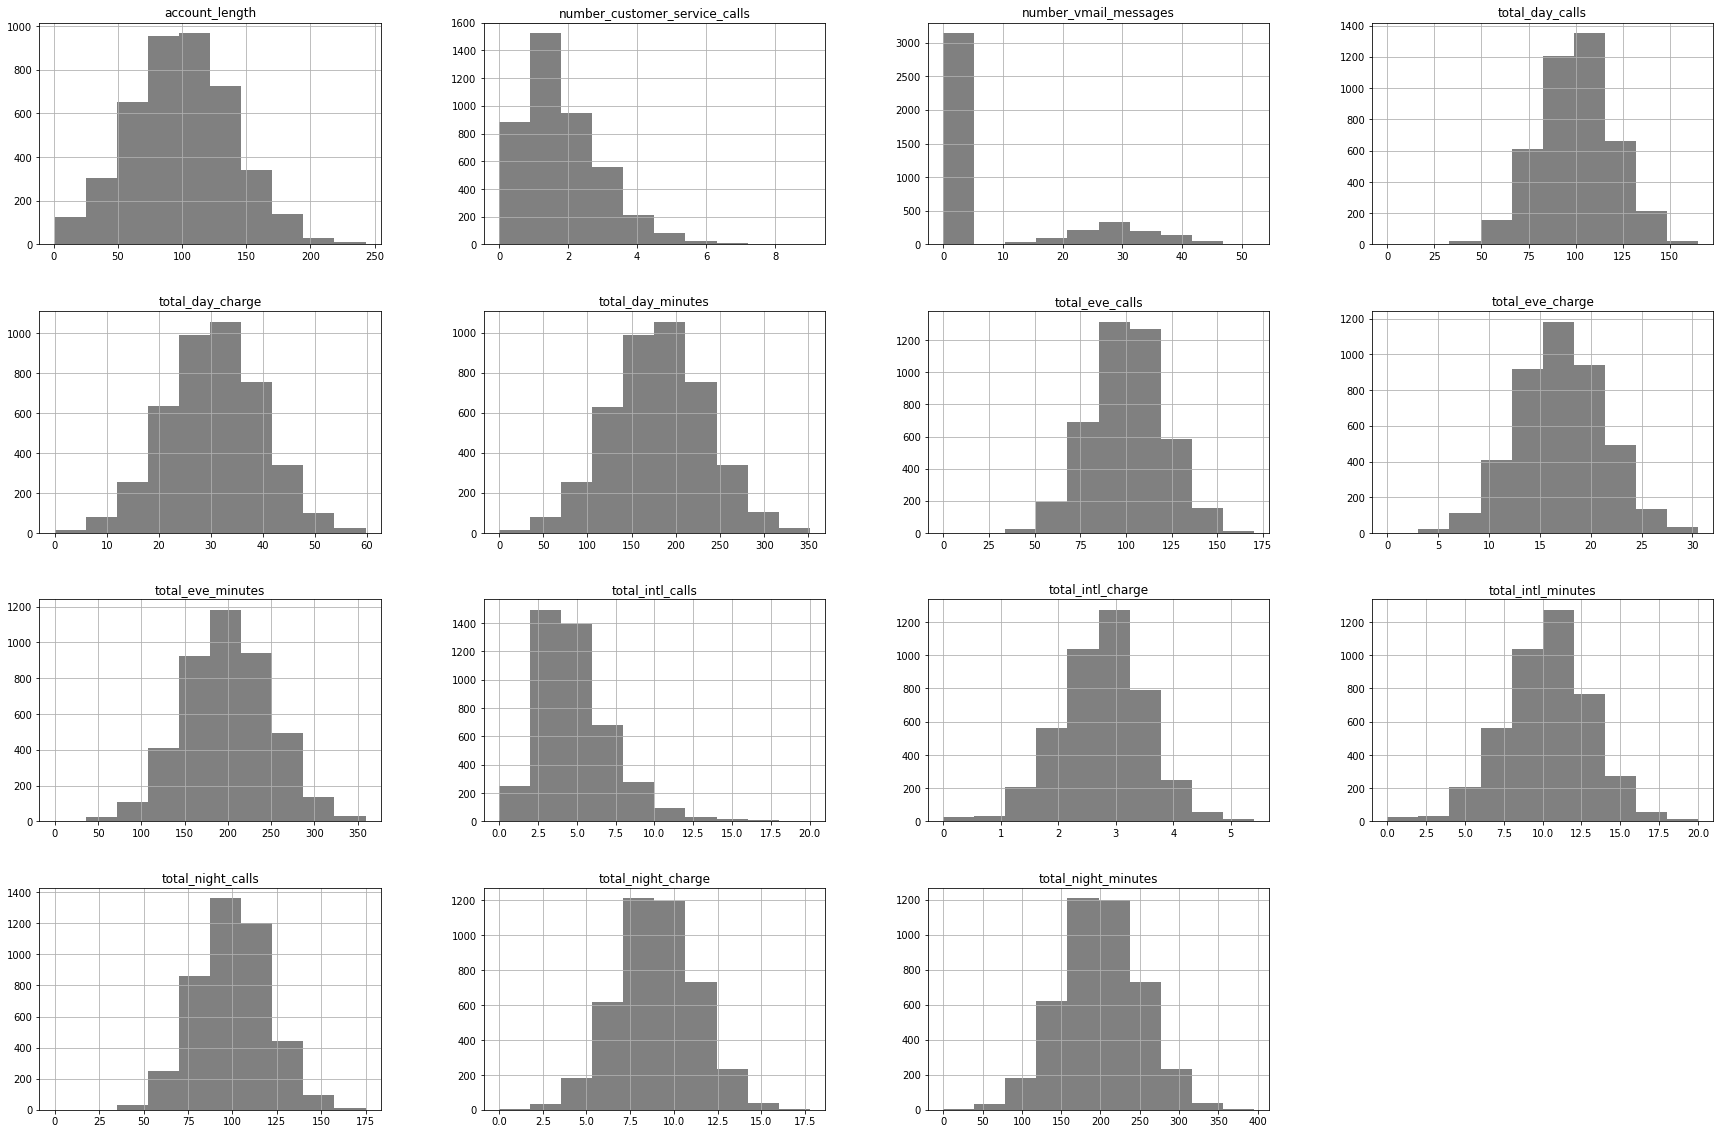

In [7]:
train.hist(color='grey',figsize=(30, 20))
plt.show()

In [34]:
train['state'] = pd.Categorical(train['state']).codes 
train['area_code'] = pd.Categorical(train['area_code']).codes
train['international_plan'] = pd.Categorical(train['international_plan']).codes   ##binary
train['voice_mail_plan'] = pd.Categorical(train['voice_mail_plan']).codes ##binary
train['churn'] = pd.Categorical(train['churn']).codes ##binary
train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,26,83,1,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,49,73,0,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,27,75,0,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,11,50,0,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [9]:
X=train
Xsample=X.sample(frac=0.1,random_state=1)
y=Xsample['churn']
Xsample=Xsample.drop('churn',axis=1)



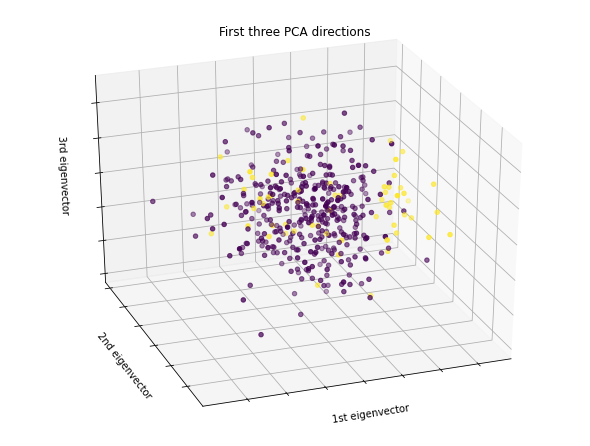

In [10]:
reduced = PCA(n_components=3).fit_transform(Xsample)
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(reduced[:, 0], reduced[:, 1], reduced[:, 2], c=y)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()



use SVM, MLP, random forest, naive bayes,knn.

In [12]:
y=train['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)

    scores.append([metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred,average='micro'),metrics.recall_score(y_test,y_pred,average='micro'),roc_auc_score(y_test,y_pred)])

scores_df=pd.DataFrame(scores)



In [13]:
print(scores_df)

           0         1         2         3
0   0.811832  0.811832  0.811832  0.629970
1   0.874555  0.874555  0.874555  0.610832
2   0.863150  0.863150  0.863150  0.642094
3   0.883108  0.883108  0.883108  0.623839
4   0.883820  0.883820  0.883820  0.648226
5   0.884533  0.884533  0.884533  0.626672
6   0.884533  0.884533  0.884533  0.642651
7   0.880969  0.880969  0.880969  0.612598
8   0.881682  0.881682  0.881682  0.623003
9   0.880257  0.880257  0.880257  0.602192
10  0.881682  0.881682  0.881682  0.619008
11  0.880969  0.880969  0.880969  0.610600
12  0.884533  0.884533  0.884533  0.624675
13  0.879544  0.879544  0.879544  0.603772
14  0.880969  0.880969  0.880969  0.614595
15  0.878831  0.878831  0.878831  0.601356
16  0.881682  0.881682  0.881682  0.613016
17  0.878118  0.878118  0.878118  0.600938
18  0.879544  0.879544  0.879544  0.609764
19  0.878118  0.878118  0.878118  0.598941
20  0.878831  0.878831  0.878831  0.607349
21  0.879544  0.879544  0.879544  0.603772
22  0.87954

In [14]:
knn = KNeighborsClassifier(n_neighbors=scores_df.idxmax()[3])
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))
print('\nClassification report: \n',classification_report(y_test, y_pred))
print('Accuracy score = ',accuracy_score(y_test, y_pred))
print('EER score = ',EER_score(y_test,y_pred))


Confusion matrix: 
 [[1186   10]
 [ 154   53]]

Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      1196
           1       0.84      0.26      0.39       207

    accuracy                           0.88      1403
   macro avg       0.86      0.62      0.66      1403
weighted avg       0.88      0.88      0.86      1403

Accuracy score =  0.8831076265146115
EER score =  0.4286478963708383


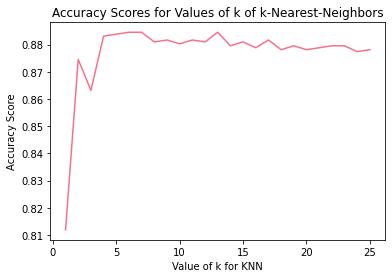

In [15]:
plt.plot(k_range, scores_df.loc[:,0])
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

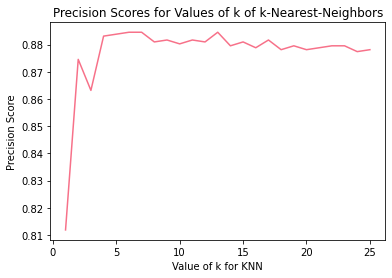

In [16]:
plt.plot(k_range, scores_df.loc[:,1])
plt.xlabel('Value of k for KNN')
plt.ylabel('Precision Score')
plt.title('Precision Scores for Values of k of k-Nearest-Neighbors')
plt.show()

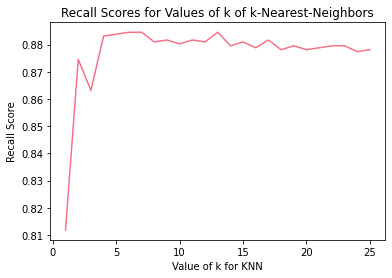

In [17]:
plt.plot(k_range, scores_df.loc[:,2])
plt.xlabel('Value of k for KNN')
plt.ylabel('Recall Score')
plt.title('Recall Scores for Values of k of k-Nearest-Neighbors')
plt.show()

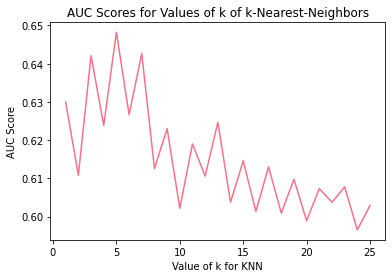

In [18]:
plt.plot(k_range, scores_df.loc[:,3])
plt.xlabel('Value of k for KNN')
plt.ylabel('AUC Score')
plt.title('AUC Scores for Values of k of k-Nearest-Neighbors')
plt.show()



Confusion matrix: 
 [[1196    0]
 [   0  207]]

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1196
           1       1.00      1.00      1.00       207

    accuracy                           1.00      1403
   macro avg       1.00      1.00      1.00      1403
weighted avg       1.00      1.00      1.00      1403

Accuracy score =  1.0
EER score =  0.0


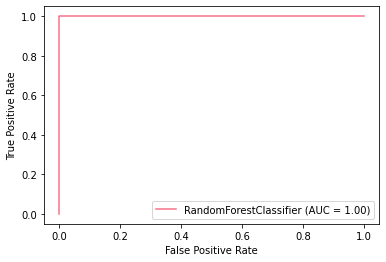

In [19]:
RFClassifier = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42,class_weight='balanced_subsample')
RFClassifier.fit(X_train, y_train)
y_pred = RFClassifier.predict(X_test)

print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))
print('\nClassification report: \n',classification_report(y_test, y_pred))
print('Accuracy score = ',accuracy_score(y_test, y_pred))
print('EER score = ',EER_score(y_test,y_pred))

RFClassifierdisp = plot_roc_curve(RFClassifier, X_test, y_test)
plt.show()


Confusion matrix: 
 [[1189    7]
 [  39  168]]

Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1196
           1       0.96      0.81      0.88       207

    accuracy                           0.97      1403
   macro avg       0.96      0.90      0.93      1403
weighted avg       0.97      0.97      0.97      1403

Accuracy score =  0.9672131147540983
EER score =  0.15932123497525338


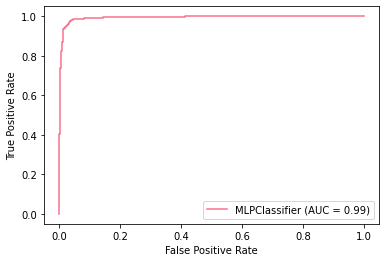

In [20]:

MLP = MLPClassifier(activation='relu', 
       hidden_layer_sizes=(250, 150, 50), random_state=7,
       shuffle=True, solver='adam'
       )
y_pred=MLP.fit(X_train, y_train).predict(X_test)
print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))
print('\nClassification report: \n',classification_report(y_test, y_pred))
print('Accuracy score = ',accuracy_score(y_test, y_pred))
print('EER score = ',EER_score(y_test,y_pred))


disp = plot_roc_curve(MLP, X_test, y_test)
plt.show()


Confusion matrix: 
 [[1196    0]
 [   0  207]]

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1196
           1       1.00      1.00      1.00       207

    accuracy                           1.00      1403
   macro avg       1.00      1.00      1.00      1403
weighted avg       1.00      1.00      1.00      1403

Accuracy score =  1.0
EER score =  0.0


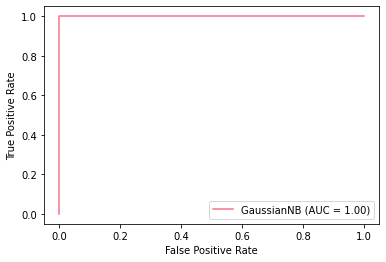

In [21]:

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))
print('\nClassification report: \n',classification_report(y_test, y_pred))
print('Accuracy score = ',accuracy_score(y_test, y_pred))
print('EER score = ',EER_score(y_test,y_pred))


disp = plot_roc_curve(gnb, X_test, y_test)
plt.show()



Confusion matrix: 
 [[1172   24]
 [  62  145]]

Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1196
           1       0.86      0.70      0.77       207

    accuracy                           0.94      1403
   macro avg       0.90      0.84      0.87      1403
weighted avg       0.94      0.94      0.94      1403

Accuracy score =  0.9387027797576621
EER score =  0.23409817020042767


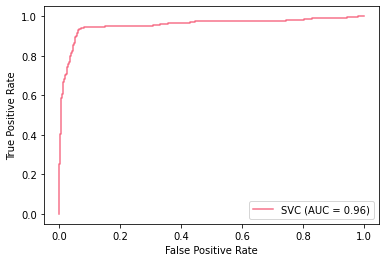

In [22]:

PSVC = SVC(kernel='poly',degree=10,class_weight='balanced',random_state=7)
PSVC.fit(X_train, y_train)
y_pred = PSVC.predict(X_test)
print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))
print('\nClassification report: \n',classification_report(y_test, y_pred))
print('Accuracy score = ',accuracy_score(y_test, y_pred))
print('EER score = ',EER_score(y_test,y_pred))
disp = plot_roc_curve(PSVC, X_test, y_test)
plt.show()

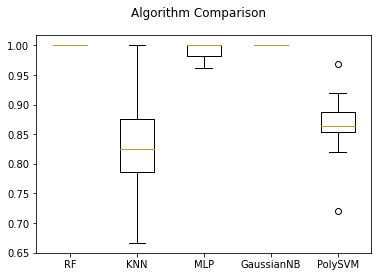

In [23]:
models = []
models.append(('RF', RFClassifier))
models.append(('KNN', knn))
models.append(('MLP', MLP))
models.append(('GaussianNB', gnb))
models.append(('PolySVM', PSVC))
results2 = []
names = []
scoring = 'precision'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results2.append(cv_results)
	names.append(name)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names)
plt.show()

In [39]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X,y)
unique, counts = np.unique(y_smt, return_counts=True)
dict(zip(unique, counts))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{0: 3642, 1: 3642}

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_smt,y_smt,test_size=0.33)

k_range = list(range(1,26))
scores = []
for k in k_range:
    knn_smote = KNeighborsClassifier(n_neighbors=k)
    knn_smote.fit(X_train,y_train)
    y_pred = knn_smote.predict(X_test)

    scores.append([metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred,average='micro'),metrics.recall_score(y_test,y_pred,average='micro'),roc_auc_score(y_test,y_pred)])

scores_df=pd.DataFrame(scores)



In [26]:
print(scores_df)

           0         1         2         3
0   0.883895  0.883895  0.883895  0.884740
1   0.912609  0.912609  0.912609  0.913137
2   0.854765  0.854765  0.854765  0.855832
3   0.877237  0.877237  0.877237  0.877963
4   0.832293  0.832293  0.832293  0.833457
5   0.850187  0.850187  0.850187  0.850981
6   0.823138  0.823138  0.823138  0.824236
7   0.834374  0.834374  0.834374  0.835100
8   0.806908  0.806908  0.806908  0.808002
9   0.817728  0.817728  0.817728  0.818454
10  0.799417  0.799417  0.799417  0.800432
11  0.806492  0.806492  0.806492  0.807108
12  0.790678  0.790678  0.790678  0.791564
13  0.797753  0.797753  0.797753  0.798332
14  0.786517  0.786517  0.786517  0.787323
15  0.789014  0.789014  0.789014  0.789570
16  0.776529  0.776529  0.776529  0.777368
17  0.780275  0.780275  0.780275  0.780814
18  0.767374  0.767374  0.767374  0.768133
19  0.777362  0.777362  0.777362  0.777864
20  0.769871  0.769871  0.769871  0.770577
21  0.769039  0.769039  0.769039  0.769528
22  0.76154


Confusion matrix: 
 [[ 942  269]
 [  10 1182]]

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.78      0.87      1211
           1       0.81      0.99      0.89      1192

    accuracy                           0.88      2403
   macro avg       0.90      0.88      0.88      2403
weighted avg       0.90      0.88      0.88      2403

Accuracy score =  0.8838951310861424
EER score =  0.18301304186524356


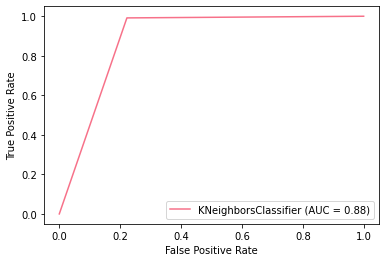

In [27]:
knn_smote = KNeighborsClassifier(n_neighbors=scores_df.idxmax()[3])
knn_smote.fit(X_train,y_train)
y_pred = knn_smote.predict(X_test)
print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))
print('\nClassification report: \n',classification_report(y_test, y_pred))
print('Accuracy score = ',accuracy_score(y_test, y_pred))
print('EER score = ',EER_score(y_test,y_pred))
knndisp = plot_roc_curve(knn_smote, X_test, y_test)
plt.show()


Confusion matrix: 
 [[1211    0]
 [   0 1192]]

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1211
           1       1.00      1.00      1.00      1192

    accuracy                           1.00      2403
   macro avg       1.00      1.00      1.00      2403
weighted avg       1.00      1.00      1.00      2403

Accuracy score =  1.0
EER score =  0.0


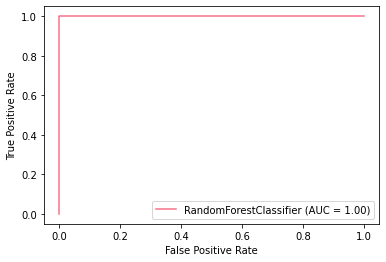

In [28]:
RFClassifier_smote = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42,class_weight='balanced_subsample')
RFClassifier_smote.fit(X_train, y_train)
y_pred = RFClassifier_smote.predict(X_test)

print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))
print('\nClassification report: \n',classification_report(y_test, y_pred))
print('Accuracy score = ',accuracy_score(y_test, y_pred))
print('EER score = ',EER_score(y_test,y_pred))

RFClassifierdisp = plot_roc_curve(RFClassifier_smote, X_test, y_test)
plt.show()


Confusion matrix: 
 [[1211    0]
 [   0 1192]]

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1211
           1       1.00      1.00      1.00      1192

    accuracy                           1.00      2403
   macro avg       1.00      1.00      1.00      2403
weighted avg       1.00      1.00      1.00      2403

Accuracy score =  1.0
EER score =  0.0


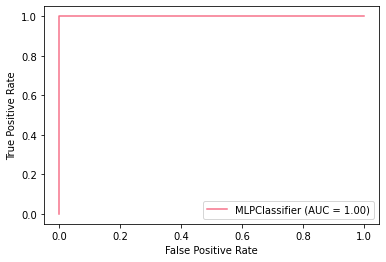

In [29]:

MLP_smote = MLPClassifier(activation='relu', 
       hidden_layer_sizes=(250, 150, 50), random_state=7,
       shuffle=True, solver='adam'
       )
y_pred=MLP_smote.fit(X_train, y_train).predict(X_test)
print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))
print('\nClassification report: \n',classification_report(y_test, y_pred))
print('Accuracy score = ',accuracy_score(y_test, y_pred))
print('EER score = ',EER_score(y_test,y_pred))


disp = plot_roc_curve(MLP_smote, X_test, y_test)
plt.show()


Confusion matrix: 
 [[1211    0]
 [   0 1192]]

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1211
           1       1.00      1.00      1.00      1192

    accuracy                           1.00      2403
   macro avg       1.00      1.00      1.00      2403
weighted avg       1.00      1.00      1.00      2403

Accuracy score =  1.0
EER score =  0.0


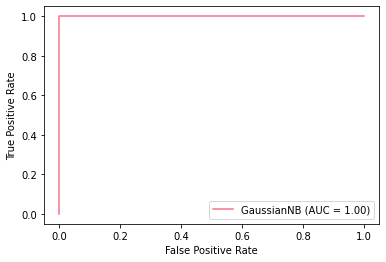

In [30]:

gnb_smote = GaussianNB()
y_pred = gnb_smote.fit(X_train, y_train).predict(X_test)

print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))
print('\nClassification report: \n',classification_report(y_test, y_pred))
print('Accuracy score = ',accuracy_score(y_test, y_pred))
print('EER score = ',EER_score(y_test,y_pred))


disp = plot_roc_curve(gnb_smote, X_test, y_test)
plt.show()


Confusion matrix: 
 [[1194   17]
 [ 237  955]]

Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      1211
           1       0.98      0.80      0.88      1192

    accuracy                           0.89      2403
   macro avg       0.91      0.89      0.89      2403
weighted avg       0.91      0.89      0.89      2403

Accuracy score =  0.8942987931751977
EER score =  0.16781532578475136


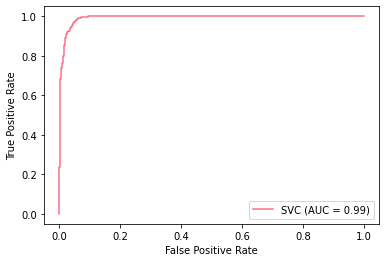

In [31]:

PSVC_smote = SVC(kernel='poly',degree=10,class_weight='balanced',random_state=7)
PSVC_smote.fit(X_train, y_train)
y_pred = PSVC_smote.predict(X_test)
print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))
print('\nClassification report: \n',classification_report(y_test, y_pred))
print('Accuracy score = ',accuracy_score(y_test, y_pred))
print('EER score = ',EER_score(y_test,y_pred))
disp = plot_roc_curve(PSVC_smote, X_test, y_test)
plt.show()

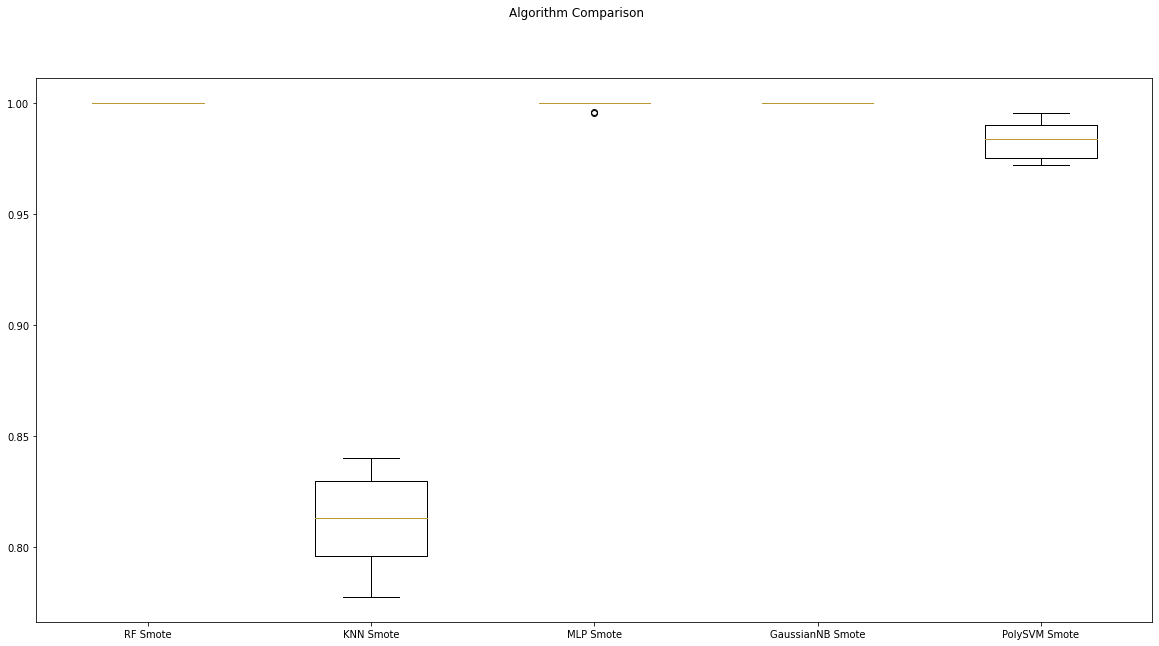

In [41]:
models = []
models.append(('RF Smote', RFClassifier_smote))
models.append(('KNN Smote', knn_smote))
models.append(('MLP Smote', MLP_smote))
models.append(('GaussianNB Smote', gnb_smote))
models.append(('PolySVM Smote', PSVC_smote))
results2 = []
names = []
scoring = 'precision'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results2.append(cv_results)
	names.append(name)

fig = plt.figure(figsize=(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names)
plt.show()

In [43]:
test['state'] = pd.Categorical(test['state']).codes 
test['area_code'] = pd.Categorical(test['area_code']).codes
test['international_plan'] = pd.Categorical(test['international_plan']).codes   ##binary
test['voice_mail_plan'] = pd.Categorical(test['voice_mail_plan']).codes ##binary
final_y=RFClassifier_smote.predict(test)

In [50]:
df = pd.DataFrame(final_y,columns=['churn']) 
df.index=df.index+1
df

,churn
1,1
2,0
3,1
4,1
5,1
...,...
746,0
747,1
748,1
749,1


In [51]:
from google.colab import files
df.to_csv('data.csv') 
files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>